
## Difusión térmica en la corteza terrestre.

Un ejemplo clásico de un problema de difusión con una condición límite variable en el tiempo es la difusión
de calor en la corteza terrestre, ya que la temperatura de la superficie varía con las estaciones. Suponer
La temperatura media diaria en un punto particular de la superficie varía como:

\begin{equation*}
T_0(t) = A + B\sin {2\pi t\over\tau},
\end{equation*}

donde  $\tau=365\,$ dias, $A=10^\circ$C y $B=12^\circ$C.  A una profundidad de 20 m debajo de la superficie, casi todos
La variación anual de temperatura se resuelve y la temperatura es, en buena aproximación,
una constante de $11^\circ$C (que es mayor que la temperatura media de la superficie de $10^\circ$C — temperatura
aumenta con la profundidad, debido al calentamiento del núcleo caliente del planeta). La difusividad térmica
de la corteza terrestre varía un poco de un lugar a otro, pero para nuestros propósitos lo trataremos
como constante con valor $D=0.1\,\mathrm{m}^2\,\mathrm{day}^{-1}$.

Escriba un programa o modifique uno de los que se incluyen en este capítulo para calcular la temperatura.
Perfil de la corteza en función de una profundidad de hasta 20 my un tiempo de hasta 10 años. Empezar con
temperatura en todas partes igual a 10 ° C, excepto en la superficie y el punto más profundo, elija
valores para el número de puntos de cuadrícula y el paso de tiempo h, luego ejecute su programa por primera vez
nueve años simulados, para permitirle establecerse en cualquier patrón que alcance. Entonces para el
décimo y último año grafique cuatro perfiles de temperatura tomados a intervalos de 3 meses en un solo gráfico
para ilustrar cómo cambia la temperatura en función de la profundidad y el tiempo.

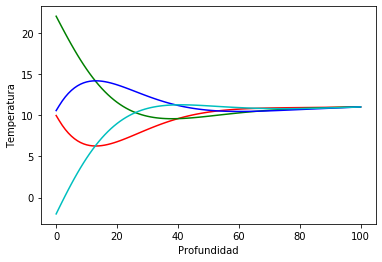

In [4]:
from numpy import empty, zeros
from pylab import imshow,gray, show, hot,inferno,cool,plot,xlabel,ylabel,legend
from scipy import array, arange, pi, sin, cos




#constantes 
A=10.  #temperatura grados centigrados
tau=365 #tiempo en dias 
B=12.  #temperatura grados centigrados
D=0.1  #difusividad termica en metros cuadrados por dias a la menos 1
L=20   #distancia en metros
N=100  #numero de divisiones de la grilla
a=L/N #espaciado de la particula
h=0.1 #paso en el timepo 
epsilon = h/100


def T0(t):
    return A + B*sin(2*pi*t/tau)

tmin = 365*9 #tiempo minimo de 9 años 
t1 = tmin   #9 años
t2 = tmin + 90 #9 años mas tres meses 
t3 = t2 + 90  #9 años mas seis meses 
t4 = t3 + 90  # 9 años mas nueve meses 
tend = t4+ epsilon 

#Creando arrays
T = empty(N+1,float)
T[1:N] = 10
Tp = empty(N+1,float)

#Bucle Principal
t = 0.0
c = h*D/(a*a)
while t<tend:
    
    #Calcular los nuevos valores de T
    T[0] = T0(t)
    T[N] = 11
    for i in range (1,N):
        Tp[i] = T[i] + c*(T[i+1]+T[i-1]-2*T[i])
    T,Tp = Tp,T
    t += h
    
    #Hacer grafico en los tiempos dados
    if abs(t-t1)<epsilon:
        plot(T,"r")
    if abs(t-t2)<epsilon:
        plot(T,"g")
    if abs(t-t3)<epsilon:
        plot(T,"b")
    if abs(t-t4)<epsilon:
        plot(T,"c")
xlabel("Profundidad")
ylabel("Temperatura")
show()

es de notar que las energias varian en los primeros metros de  profundidad para luego finalmente tender a un valor constante, lo que indica que la funcion seno genera variaciones en el valor de la temperatura.